In [1]:
# -*- coding: utf-8 -*-
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import classification_report
from sklearn.naive_bayes import BernoulliNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cross_validation import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
import os

C:\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
o = os.getcwd()
inputfile = o+'\\sales_data.xls'
inputfile

'C:\\Users\\41914\\Documents\\Language\\new\\learn_python\\Learn_Python\\13\\sales_data.xls'

In [3]:
####knn最邻近算法####

data = pd.read_excel(inputfile, index_col = u'序号') #导入数据
data.head()

,天气,是否周末,是否有促销,销量
序号,,,,
1,坏,是,是,高
2,坏,是,是,高
3,坏,是,是,高
4,坏,否,是,高
5,坏,是,是,高


In [5]:
data[data == u'好']

,天气,是否周末,是否有促销,销量
序号,,,,
1,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN
8,好,NaN,NaN,NaN
9,好,NaN,NaN,NaN


In [6]:
#数据是类别标签，要将它转换为数据
#用1来表示“好”、“是”、“高”这三个属性，用-1来表示“坏”、“否”、“低”
data[data == u'好'] = 1
data[data == u'是'] = 1
data[data == u'高'] = 1
data[data != 1] = -1
x = data.iloc[:,:3].as_matrix().astype(int)
y = data.iloc[:,3].as_matrix().astype(int)
data.head()

,天气,是否周末,是否有促销,销量
序号,,,,
1,-1,1,1,1
2,-1,1,1,1
3,-1,1,1,1
4,-1,-1,1,1
5,-1,1,1,1


In [106]:
#拆分训练数据与测试数据 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [98]:
#训练KNN分类器 
knl = KNeighborsClassifier(algorithm='kd_tree')
knl.fit(x_train, y_train)

#测试结果
answer = knl.predict(x_test)
print("x_test: \n",x_test,"\n")
print("answer: \n",answer,"\n")
print("y_test: \n",y_test,"\n")
print("np.mean( answer == y_test): \n",np.mean( answer == y_test),"\n")

#准确率
precision, recall, thresholds = precision_recall_curve(y_train, knl.predict(x_train))
print("classification_report: \n",classification_report(y_test, answer, target_names = ['低', '高']))

x_test: 
 [[ 1  1  1]
 [-1 -1  1]
 [-1  1  1]
 [ 1  1  1]
 [-1  1  1]
 [ 1  1  1]
 [ 1 -1  1]] 

answer: 
 [ 1 -1  1  1  1  1 -1] 

y_test: 
 [1 1 1 1 1 1 1] 

np.mean( answer == y_test): 
 0.7142857142857143 

classification_report: 
              precision    recall  f1-score   support

          低       0.00      0.00      0.00         0
          高       1.00      0.71      0.83         7

avg / total       1.00      0.71      0.83         7



C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [102]:
####贝叶斯分类器####
#训练贝叶斯分类器
bnb = BernoulliNB() 
bnb.fit(x_train,y_train)


#测试结果
answer = bnb.predict(x_test)
print("x_test: \n",x_test,"\n")
print("answer: \n",answer,"\n")
print("y_test: \n",y_test,"\n")
print("np.mean( answer == y_test): \n",np.mean( answer == y_test),"\n")

print("classification_report: \n",classification_report(y_test, answer, target_names = ['低', '高']))

x_test: 
 [[ 1  1  1]
 [-1 -1  1]
 [-1  1  1]
 [ 1  1  1]
 [-1  1  1]
 [ 1  1  1]
 [ 1 -1  1]] 

answer: 
 [ 1 -1  1  1  1  1  1] 

y_test: 
 [1 1 1 1 1 1 1] 

np.mean( answer == y_test): 
 0.8571428571428571 

classification_report: 
              precision    recall  f1-score   support

          低       0.00      0.00      0.00         0
          高       1.00      0.86      0.92         7

avg / total       1.00      0.86      0.92         7



C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [103]:
####决策树####
from sklearn.tree import DecisionTreeClassifier as DTC
dtc = DTC(criterion='entropy') #建立决策树模型，基于信息熵
dtc.fit(x_train, y_train) #训练模型

#导入相关函数，可视化决策树。
#导出的结果是一个dot文件，需要安装Graphviz才能将它转换为pdf或png等格式。
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
with open("tree.dot", 'w') as f:
  f = export_graphviz(dtc, out_file = f)


#测试结果
answer = dtc.predict(x_test)

print("x_test: \n",x_test,"\n")
print("answer: \n",answer,"\n")
print("y_test: \n",y_test,"\n")
print("np.mean( answer == y_test): \n",np.mean( answer == y_test),"\n")
print("classification_report: \n",classification_report(y_test, answer, target_names = ['低', '高']))

x_test: 
 [[ 1  1  1]
 [-1 -1  1]
 [-1  1  1]
 [ 1  1  1]
 [-1  1  1]
 [ 1  1  1]
 [ 1 -1  1]] 

answer: 
 [ 1 -1  1  1  1  1 -1] 

y_test: 
 [1 1 1 1 1 1 1] 

np.mean( answer == y_test): 
 0.7142857142857143 

classification_report: 
              precision    recall  f1-score   support

          低       0.00      0.00      0.00         0
          高       1.00      0.71      0.83         7

avg / total       1.00      0.71      0.83         7



C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [86]:
os.unlink('tree.dot') 
dot_data = StringIO()
tree.export_graphviz(dtc, out_file=dot_data)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_pdf("tree.pdf")#写入pdf

True

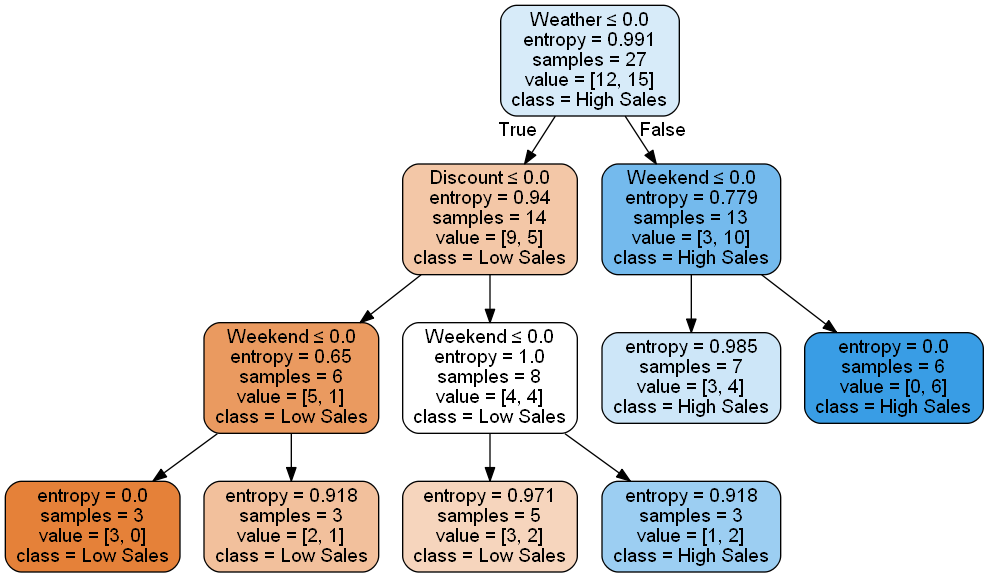

In [111]:
import sklearn.tree as tree
import pydotplus 
from IPython.display import Image

#os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

#dtc = DTC(criterion='entropy') #建立决策树模型，基于信息熵
#dtc_fit = dtc.fit(x_train, y_train) 
clf= DTC(criterion='entropy')
clf_fit=clf.fit(x_train, y_train) 

dot_data = tree.export_graphviz(clf_fit, 
                                out_file=None,
                                feature_names=["Weather","Weekend","Discount"], 
                                class_names=["Low Sales","High Sales"], 
                                filled=True, rounded=True, 
                                special_characters=True) 
graph = pydotplus.graph_from_dot_data(dot_data) 
Image(graph.create_png())

In [97]:
####SVM####
from sklearn.svm import SVC
svc =SVC() #线性可分时，使用SVC
svc.fit(x_train, y_train)  

#测试结果
answer = svc.predict(x_test)

print("x_test: \n",x_test,"\n")
print("answer: \n",answer,"\n")
print("y_test: \n",y_test,"\n")
print("np.mean( answer == y_test): \n",np.mean( answer == y_test),"\n")

print("classification_report: \n",classification_report(y_test, answer, target_names = ['低', '高']))

x_test: 
 [[ 1  1  1]
 [-1 -1  1]
 [-1  1  1]
 [ 1  1  1]
 [-1  1  1]
 [ 1  1  1]
 [ 1 -1  1]] 

answer: 
 [ 1 -1  1  1  1  1 -1] 

y_test: 
 [1 1 1 1 1 1 1] 

np.mean( answer == y_test): 
 0.7142857142857143 

classification_report: 
              precision    recall  f1-score   support

          低       0.00      0.00      0.00         0
          高       1.00      0.71      0.83         7

avg / total       1.00      0.71      0.83         7



C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
